In [1]:
import torch
from robustness.datasets import CIFAR
from robustness.model_utils import make_and_restore_model
import matplotlib.pyplot as plt
from utils import training_loop
import tqdm
names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [2]:
make_adv = False
epoch=50
lr=1e-2

ds = CIFAR('/mnt/f/cifar-100-python/')
train_loader, test_loader = ds.make_loaders(workers=16, batch_size=1024,data_aug=True)
model, _ = make_and_restore_model(arch='convnext_small', dataset=ds,pytorch_pretrained=True)
print(len(test_loader))
criterion= lambda pred,label : torch.nn.functional.cross_entropy(torch.softmax(pred,dim=1),label)
optimizer=torch.optim.SGD(model.parameters(),lr=lr)
scaler = torch.cuda.amp.GradScaler()
scheduler=torch.optim.lr_scheduler.OneCycleLR(max_lr=lr,epochs=epoch,steps_per_epoch=len(train_loader),optimizer=optimizer)
device="cuda:0"
for i in range(epoch) :
    loss = training_loop(model,loader=tqdm.tqdm(train_loader),criterion=criterion,optimizer=optimizer,scaler=scaler,autocast=False,scheduler=scheduler,device=device,clip_norm=100,epoch=i)

    print(loss)
model.eval()
attack_kwargs = {
   'constraint': 'inf', # L-inf PGD
   'eps': 0.05, # Epsilon constraint (L-inf norm)
   'step_size': 0.01, # Learning rate for PGD
   'iterations': 100, # Number of PGD steps
   'targeted': True, # Targeted attack
   'custom_loss': None # Use default cross-entropy loss
}


im, label = next(iter(test_loader))
target_label = (label + torch.randint_like(label, high=9)) % 10
adv_out, adv_im = model(im, target_label, make_adv, **attack_kwargs)

==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified
10


100%|██████████| 49/49 [01:15<00:00,  1.54s/it]


tensor(112.8515, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(112.6300, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(112.2010, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(111.2969, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(109.1010, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(104.2559, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.20s/it]


tensor(98.9047, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(95.1083, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(92.0190, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(89.2730, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(87.4245, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(86.0503, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(84.7404, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(83.6976, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(82.7745, device='cuda:0')


100%|██████████| 49/49 [01:02<00:00,  1.28s/it]


tensor(82.2855, device='cuda:0')


100%|██████████| 49/49 [01:02<00:00,  1.28s/it]


tensor(81.8022, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(81.3744, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(80.9866, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(80.7180, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(80.4317, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(80.2028, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(79.9754, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(79.6888, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(79.5840, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(79.4061, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(79.2591, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(79.0772, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(78.9694, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(78.8455, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(78.6890, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(78.5665, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(78.4635, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.20s/it]


tensor(78.3915, device='cuda:0')


100%|██████████| 49/49 [01:00<00:00,  1.22s/it]


tensor(78.3395, device='cuda:0')


100%|██████████| 49/49 [01:00<00:00,  1.23s/it]


tensor(78.2187, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(78.0984, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(78.0633, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.22s/it]


tensor(78.0684, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(77.9510, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(77.8789, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(77.8270, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(77.8145, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(77.7619, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(77.7119, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]


tensor(77.6903, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.21s/it]


tensor(77.6419, device='cuda:0')


100%|██████████| 49/49 [01:00<00:00,  1.23s/it]


tensor(77.6568, device='cuda:0')


100%|██████████| 49/49 [00:59<00:00,  1.20s/it]


tensor(77.6154, device='cuda:0')


100%|██████████| 49/49 [00:58<00:00,  1.20s/it]

tensor(77.6867, device='cuda:0')


torch.Size([1024, 10]) torch.Size([1024, 3, 32, 32])
cat tensor([-0.4940, -1.1533, -2.0286,  7.2464, -1.6749,  1.0541, -1.2783,  0.8525,
        -1.3348, -1.7624], device='cuda:0', grad_fn=<UnbindBackward0>)


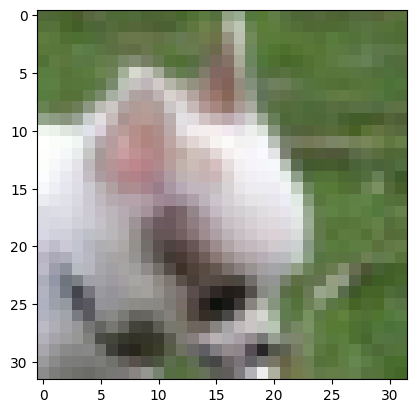

frog tensor([-0.2056, -0.8515,  0.0840, -0.9089, -2.2845, -1.0611,  7.6013, -1.1162,
        -0.1519, -0.7032], device='cuda:0', grad_fn=<UnbindBackward0>)


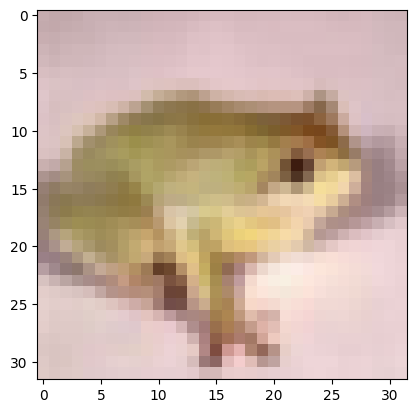

ship tensor([ 0.4495, -1.7888, -1.7608, -0.1929, -1.3858, -0.1875, -1.6198, -2.1702,
        11.2227, -1.4098], device='cuda:0', grad_fn=<UnbindBackward0>)


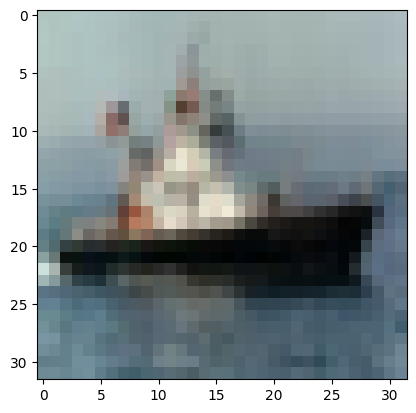

dog tensor([-1.9412, -2.1296, -2.8083,  2.8331, -2.3879,  8.8773, -1.2760,  0.4261,
        -0.4406, -1.1290], device='cuda:0', grad_fn=<UnbindBackward0>)


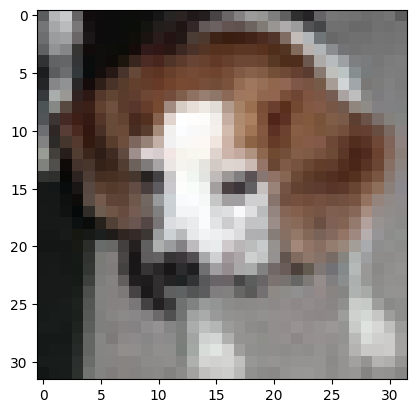

deer tensor([-0.2120, -1.3590,  0.9081, -0.5717,  9.3014, -3.4382,  1.2737, -2.0796,
        -0.8610, -1.7505], device='cuda:0', grad_fn=<UnbindBackward0>)


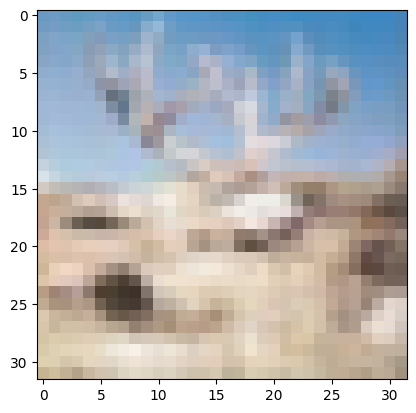

bird tensor([ 1.3038, -0.3632,  9.4151, -0.9512,  2.2377, -2.7041, -1.3183, -1.7813,
        -2.1185, -1.7654], device='cuda:0', grad_fn=<UnbindBackward0>)


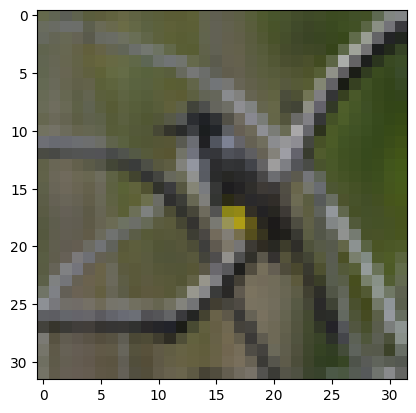

ship tensor([ 0.1395, -1.0739, -1.9089, -0.4718, -1.3774, -0.6091, -1.9402, -2.6839,
        12.0763, -1.0243], device='cuda:0', grad_fn=<UnbindBackward0>)


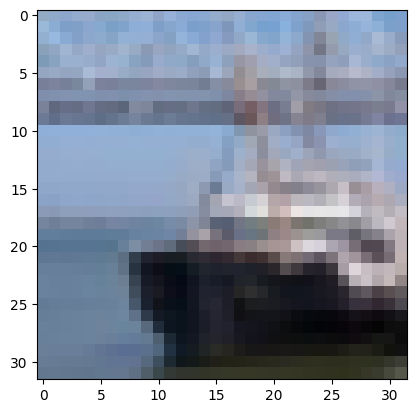

cat tensor([-0.9445, -1.5839, -1.6156,  7.4979, -2.1215, -2.6745,  4.4664, -1.6201,
         0.0800, -1.8702], device='cuda:0', grad_fn=<UnbindBackward0>)


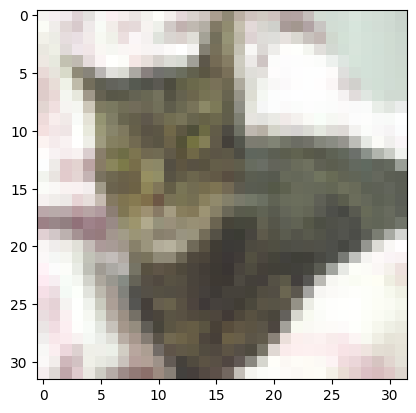

cat tensor([-1.7880, -2.0826, -4.2080,  6.7635,  4.2435,  4.7306, -2.4704, -1.4064,
        -1.5002, -1.8153], device='cuda:0', grad_fn=<UnbindBackward0>)


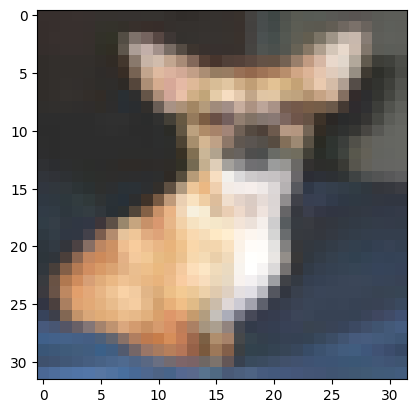

frog tensor([-0.4068, -0.7656, -0.9370, -0.2488, -3.0951, -0.7552,  8.7151, -1.7645,
        -0.2326, -0.5646], device='cuda:0', grad_fn=<UnbindBackward0>)


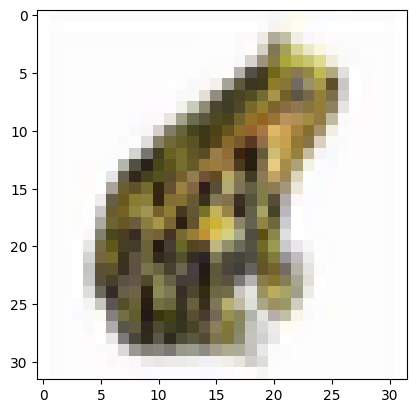

automobile tensor([-1.9925,  9.4898, -0.2449, -0.5169, -1.1120, -0.6997, -1.0041, -2.2170,
        -0.9608,  0.9196], device='cuda:0', grad_fn=<UnbindBackward0>)


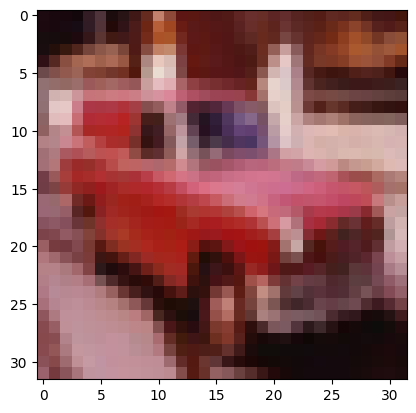

In [4]:
print(adv_out.shape, adv_im.shape)
#plt.imshow(adv_out[0].detach().cpu().numpy())
#plt.show()
for ex,(im,pred) in enumerate(zip(adv_im,adv_out)) :
    print(names[torch.argmax(torch.softmax(pred,dim=0))],pred)
    plt.imshow(im.detach().cpu().permute(1,2,0).numpy())
    plt.show()
    if ex==10 :
        break